In [1]:
using Pkg
Pkg.add(["XLSX","Flux", "DataFrames", "Statistics", "Random", "ProgressLogging", "ForwardDiff", "Plots"]) # Installing the necessary packages
using XLSX, DataFrames, Statistics, Random, ProgressLogging, ForwardDiff, Plots



    Updating registry at `C:\Users\osamani2\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\osamani2\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\osamani2\.julia\environments\v1.11\Manifest.toml`


In [2]:
# Specify the Excel file name
file = "Concrete_Data.xlsx"

# Load the Excel sheet
sheet = XLSX.readtable(file, "Sheet1")

# Create a DataFrame from the sheet
data = DataFrame(sheet)

# Convert all columns to Float64 where possible
for c in names(data)
    try
        data[!, c] = Float64.(data[!, c])
    catch
        # Ignore columns that are not purely numeric (e.g. text columns)
    end
end

# Inspecting the first 5 rows of the dataset
first(data, 5)

Row,Cement (Kg/m3),Blast Furnace Slag (Kg/m3),Fly Ash (Kg/m3),Water (Kg/m3),Superplasticizer (Kg/m3),Coarse Aggregate (Kg/m3),Fine Aggregate (Kg/m3),Age (day),Concrete compressive strength (MPa)
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.9861
2,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.8874
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.2695
4,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.0528
5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.2961


In [3]:
rename!(data, [
    "Cement", "Slag", "FlyAsh", "Water", "Superplasticizer",
    "CoarseAgg", "FineAgg", "Age", "Strength"
])

Row,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.9861
2,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.8874
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.2695
4,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.0528
5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.2961
6,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.0298
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.6983
8,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.4478
9,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.8543


In [4]:
# remove duplicates
data = unique(data)

Row,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.9861
2,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.8874
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.2695
4,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.0528
5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.2961
6,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.0298
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.6983
8,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.4478
9,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.8543


In [5]:
# 1) ENGINEERED FEATURES

println("\n" * "="^50)
println("7️⃣  ENGINEERED FEATURES")
println("="^50)

# Feature 1: Water/Cement ratio
water_cement_ratio = data.Water ./ (data.Cement .+ 1e-10)

# Feature 2: Total Binder
total_binder = data.Cement .+ data.Slag .+ data.FlyAsh

# Feature 3: Total Aggregate
total_aggregate = data.CoarseAgg .+ data.FineAgg

# Feature 4: Binder/Aggregate ratio
binder_aggregate_ratio = total_binder ./ (total_aggregate .+ 1e-10)

# Feature 5: Superplasticizer per binder
superplast_per_binder = data.Superplasticizer ./ (total_binder .+ 1e-10)

# Feature 6: Age (unchanged)
age = data.Age

# Combine engineered features
x_engineered = hcat(
    water_cement_ratio,
    total_binder,
    total_aggregate,
    binder_aggregate_ratio,
    superplast_per_binder,
    age
)

# Normalize engineered features (n × 6)
x_eng_norm = (x_engineered .- mean(x_engineered, dims=1)) ./ std(x_engineered, dims=1)



7️⃣  ENGINEERED FEATURES


1005×6 Matrix{Float64}:
 -1.45514     1.46344    -0.303854    1.24837     -0.719232   -0.280173
 -1.45514     1.46344    -0.157126    1.20542     -0.719232   -0.280173
 -0.22489     0.752461   -2.1624      1.19459     -1.06347     3.51682
 -0.22489     0.752461   -2.1624      1.19459     -1.06347     5.00737
  0.671541   -0.822624    0.555969   -0.818291    -1.06347     4.92892
  0.321889   -0.286658   -1.41898     0.0278219   -1.06347     0.69261
 -0.49828     0.752461   -2.1624      1.19459     -1.06347     5.00737
 -0.49828     0.752461   -2.1624      1.19459     -1.06347    -0.280173
  0.321889   -0.286658   -1.41898     0.0278219   -1.06347    -0.280173
 -0.881026    0.752461   -2.1624      1.19459     -1.06347    -0.280173
  0.671541   -0.822624    0.555969   -0.818291    -1.06347     0.69261
  0.671541   -0.822624    0.555969   -0.818291    -1.06347    -0.280173
 -0.710917    0.752461   -2.1624      1.19459     -1.06347     3.51682
  ⋮                                            

In [6]:
# Normalisieren (Standardisierung)
function standardize(col)
    μ = mean(col)
    σ = std(col)
    return (col .- μ) ./ σ, μ, σ
end

X = Matrix(data[:, 1:8])'
y = data[:, 9]

X_std = similar(X)
μs = Float64[]
σs = Float64[]

for j in 1:size(X,1)
    col, μ, σ = standardize(X[j, :])
    X_std[j,:] = col
    push!(μs, μ)
    push!(σs, σ)
end

In [7]:

# 3) ENGINEERED + ORIGINAL FEATURES KOMBINIEREN


# Engineered features transponieren → (6 × n)
x_eng_t = x_eng_norm'

# Merge: jetzt (14 × n)
X_all = x_eng_t
#X_all = vcat(X_std, x_eng_t)

# Set correct inputsize
inputsize = size(X_all, 1)   # = 14
outputsize = 1

1

In [8]:

# 4) TRAIN/TEST SPLIT


Random.seed!(123)
n = size(X_all, 2)
idx = shuffle(1:n)

train_idx = idx[1:floor(Int, 0.8n)]
test_idx  = idx[floor(Int, 0.8n)+1:end]

Xtrain = X_all[:, train_idx]
ytrain = y[train_idx]

Xtest  = X_all[:, test_idx]
ytest  = y[test_idx]

201-element Vector{Float64}:
 47.8151606
 40.7135578
 67.79617508
 66.82401392
 64.90037588
 45.3675208
 32.109882284729316
 34.23937816
 22.435549039999998
 17.96429718
 45.2985732
 33.419591196
 13.461329424
  ⋮
 38.99676256
 20.593958644
 59.89478012
 17.54026944
 39.700028079999996
 32.66047812
  8.374375495999999
 29.231713971999998
 56.63355864
 26.94472208
 61.09446836
 55.064311264

In [9]:
### 7️⃣ Neural Network Model
using Flux
using Statistics
struct Metrics
    r2::Float64
    rmse::Float64
    mae::Float64
end
function calculate_metrics(y_true, y_pred)
    y_true = collect(y_true)
    y_pred = collect(y_pred)

    ss_res = sum((y_true .- y_pred).^2)
    ss_tot = sum((y_true .- mean(y_true)).^2)

    r2 = 1 - ss_res / ss_tot
    rmse = sqrt(mean((y_true .- y_pred).^2))
    mae = mean(abs.(y_true .- y_pred))

    return Metrics(r2, rmse, mae)
end
# Simple neural network using Flux
	nn_model = Chain(
		Dense(6 => 128, relu),
		Dense(128 => 64, relu),
		Dense(64 => 64, relu),
		Dense(64 => 32, relu),
		Dense(32 => 16, relu),
		Dense(16 => 1)
	)
	
X_mean = mean(X_all, dims=2)
X_std  = std(X_all, dims=2)

X_all_norm = (X_all .- X_mean) ./ X_std

Xtrain = X_all_norm[:, train_idx]
Xtest  = X_all_norm[:, test_idx]

ytrain = y[train_idx]
ytest  = y[test_idx]
	# Convert data to Float32 for neural network
	X_train_nn = Float32.(Xtrain)
	X_test_nn = Float32.(Xtest)
	y_train_nn = Float32.(reshape(ytrain, 1, :))
	y_test_nn = Float32.(reshape(ytest, 1, :))
	
	println("X_train_nn shape: ", size(X_train_nn))
	println("y_train_nn shape: ", size(y_train_nn))
	
	# Test initial predictions
	initial_pred = nn_model(X_train_nn)
	initial_loss = Flux.mse(initial_pred, y_train_nn)
	println("Initial loss: $(round(initial_loss, digits=4))")
	
	# Setup optimizer
	opt_state = Flux.setup(Adam(0.01), nn_model)
	
	# Training loop
	losses = Float64[]
	for epoch in 1:2000
		# Compute loss and gradient
		loss_val, grads = Flux.withgradient(nn_model) do m
			predictions = m(X_train_nn)
			Flux.mse(predictions, y_train_nn)
		end
		
		# Update model parameters
		Flux.update!(opt_state, nn_model, grads[1])
		
		push!(losses, loss_val)
		if epoch % 200 == 0
			println("Epoch $epoch, Loss: $(round(loss_val, digits=4))")
		end
	end
	
	println("\nTotal epochs completed: $(length(losses))")
	
	# Make predictions
	y_pred_nn_train = vec(nn_model(X_train_nn))
	y_pred_nn_test = vec(nn_model(X_test_nn))
	
	
	# Calculate metrics
	nn_train_metrics = calculate_metrics(ytrain, y_pred_nn_train)
	nn_test_metrics = calculate_metrics(ytest, y_pred_nn_test)
	
	# Add to results
	nn_results = DataFrame(
		Model = ["Neural Network", "Neural Network"],
		Dataset = ["Train", "Test"],
		R² = [nn_train_metrics.r2, nn_test_metrics.r2],
		RMSE = [nn_train_metrics.rmse, nn_test_metrics.rmse],
		MAE = [nn_train_metrics.mae, nn_test_metrics.mae]
	)
	
	println("\nNeural Network completed!")
	println("Train R²: $(round(nn_train_metrics.r2, digits=3))")
	println("Test R²: $(round(nn_test_metrics.r2, digits=3))")
	
	# Show loss progression
	if length(losses) >= 10
		println("\nFirst 5 losses: ", round.(losses[1:5], digits=4))
		println("Last 5 losses: ", round.(losses[end-4:end], digits=4))
		println("Loss reduction: $(round(100 * (1 - losses[end]/losses[1]), digits=2))%")
	end
	
	nn_results

X_train_nn shape: (6, 804)
y_train_nn shape: (1, 804)
Initial loss: 1496.6544
Epoch 200, Loss: 22.5863
Epoch 400, Loss: 16.5356
Epoch 600, Loss: 16.7653
Epoch 800, Loss: 18.589
Epoch 1000, Loss: 7.8425
Epoch 1200, Loss: 7.1266
Epoch 1400, Loss: 7.0038
Epoch 1600, Loss: 5.39
Epoch 1800, Loss: 4.9302
Epoch 2000, Loss: 9.8517

Total epochs completed: 2000

Neural Network completed!
Train R²: 0.956
Test R²: 0.823

First 5 losses: [1496.6544, 1479.0757, 1453.9614, 1406.0859, 1319.5637]
Last 5 losses: [5.999, 6.7287, 7.397, 8.9822, 9.8517]
Loss reduction: 99.34%


Row,Model,Dataset,R²,RMSE,MAE
,String,String,Float64,Float64,Float64
1,Neural Network,Train,0.955643,3.42198,2.55347
2,Neural Network,Test,0.822554,6.88542,4.87536


In [10]:
y_pred_test =y_pred_nn_test


201-element Vector{Float32}:
 49.33697
 31.009645
 68.27245
 57.87526
 72.57889
 54.072994
 30.456228
 37.294224
 23.102057
 22.045553
 42.435047
 33.99692
 13.618651
  ⋮
 34.969337
 22.049007
 55.028717
 18.574398
 40.324223
 29.93185
  7.41958
 33.66356
 53.85845
 21.299189
 58.137463
 50.55978

In [11]:
test_mse = mse(y_pred_test, ytest)
test_rmse = sqrt(test_mse)

println("Test MSE  = $test_mse")
println("Test RMSE = $test_rmse")

LoadError: UndefVarError: `mse` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name also exists in Flux.

In [ ]:
mae = mean(abs.(y_pred_test .- ytest))
println("Test MAE = $mae")

Test MAE = 4.154880985903106


In [ ]:
# R²-Berechnung
ss_res = sum((ytest .- y_pred_test).^2)
ss_tot = sum((ytest .- mean(ytest)).^2)

r2 = 1 - ss_res / ss_tot

println("R² = $r2")

R² = 0.8730866125699664


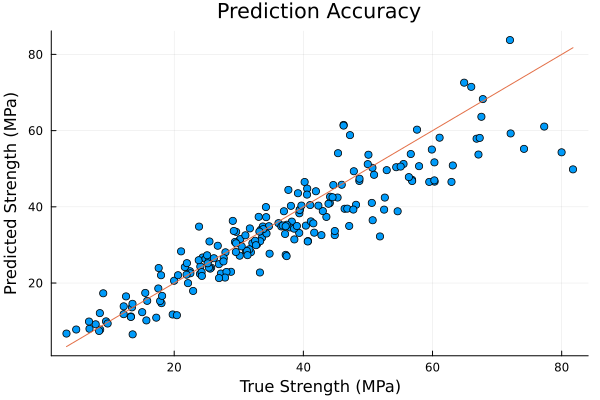

In [15]:
p=scatter(ytest, y_pred_test,
    xlabel="True Strength (MPa)",
    ylabel="Predicted Strength (MPa)",
    title="Prediction Accuracy",
    legend=false)
plot!(identity, label="Ideal fit")

# Save the figure
savefig(p, "figures-NeuralNetwork-Georg/01_PredictionAccuracy.png")
p

In [ ]:
# --- Training Predictions ---
y_pred_train = y_pred_nn_train

# --- Training MSE ---
train_mse = mse(y_pred_train, ytrain)

# --- Training RMSE ---
train_rmse = sqrt(train_mse)

# --- Training MAE ---
train_mae = mean(abs.(y_pred_train .- ytrain))

# --- Training R2 ---
ss_res_train = sum((ytrain .- y_pred_train).^2)
ss_tot_train = sum((ytrain .- mean(ytrain)).^2)
train_r2 = 1 - ss_res_train / ss_tot_train

println("Train MSE  = $train_mse")
println("Train RMSE = $train_rmse")
println("Train MAE  = $train_mae")
println("Train R²   = $train_r2")

Train MSE  = 6.862805011401101
Train RMSE = 2.6196955951791616
Train MAE  = 1.8868309193980592
Train R²   = 0.9740036081708051


In [ ]:
function r2_score(ŷ, y)
    ss_res = sum((y .- ŷ).^2)
    ss_tot = sum((y .- mean(y)).^2)
    return 1 - ss_res/ss_tot
end

r2_score (generic function with 1 method)

In [ ]:

function kfold_cv_flux(X, y; K=5, learning_rate=0.01, epochs=2000)
    n = size(X, 2)
    idx = shuffle(1:n)
    fold_size = floor(Int, n / K)

    fold_metrics = Metrics[]
    
    println("Starting $(K)-fold cross-validation...")
    println("="^60)

    for k in 1:K
        println("\nFold $k/$K")
        println("-"^40)
        
        # Split indices
        val_start = (k - 1) * fold_size + 1
        val_end   = k == K ? n : k * fold_size
        val_idx   = idx[val_start:val_end]
        train_idx = setdiff(idx, val_idx)

        # Split data
        Xtrain = X[:, train_idx]
        ytrain = y[train_idx]
        Xval   = X[:, val_idx]
        yval   = y[val_idx]
        
        # Normalize using training data statistics
        X_mean = mean(Xtrain, dims=2)
        X_std  = std(Xtrain, dims=2)
        
        Xtrain_norm = (Xtrain .- X_mean) ./ X_std
        Xval_norm   = (Xval .- X_mean) ./ X_std

        # Convert to Float32
        X_train_nn = Float32.(Xtrain_norm)
        X_val_nn = Float32.(Xval_norm)
        y_train_nn = Float32.(reshape(ytrain, 1, :))
        y_val_nn = Float32.(reshape(yval, 1, :))

        # Create model (same architecture as your definition)
        input_size = size(X_train_nn, 1)
        nn_model = Chain(
            Dense(input_size => 128, relu),
            Dense(128 => 64, relu),
            Dense(64 => 64, relu),
            Dense(64 => 32, relu),
            Dense(32 => 16, relu),
            Dense(16 => 1)
        )

        # Setup optimizer
        opt_state = Flux.setup(Adam(learning_rate), nn_model)

        # Training loop
        for epoch in 1:epochs
            loss_val, grads = Flux.withgradient(nn_model) do m
                predictions = m(X_train_nn)
                Flux.mse(predictions, y_train_nn)
            end
            
            Flux.update!(opt_state, nn_model, grads[1])
            
            if epoch % 500 == 0
                println("  Epoch $epoch, Loss: $(round(loss_val, digits=4))")
            end
        end

        # Make predictions on validation set
        y_pred_val = vec(nn_model(X_val_nn))

        # Calculate metrics
        metrics = calculate_metrics(yval, y_pred_val)
        push!(fold_metrics, metrics)
        
        println("  Validation R²: $(round(metrics.r2, digits=4))")
        println("  Validation RMSE: $(round(metrics.rmse, digits=4))")
        println("  Validation MAE: $(round(metrics.mae, digits=4))")
    end

    # Calculate mean metrics across folds
    mean_r2 = mean([m.r2 for m in fold_metrics])
    mean_rmse = mean([m.rmse for m in fold_metrics])
    mean_mae = mean([m.mae for m in fold_metrics])
    
    std_r2 = std([m.r2 for m in fold_metrics])
    std_rmse = std([m.rmse for m in fold_metrics])
    std_mae = std([m.mae for m in fold_metrics])
    
    println("\n" * "="^60)
    println("Cross-Validation Results:")
    println("-"^40)
    println("Mean R²:   $(round(mean_r2, digits=4)) ± $(round(std_r2, digits=4))")
    println("Mean RMSE: $(round(mean_rmse, digits=4)) ± $(round(std_rmse, digits=4))")
    println("Mean MAE:  $(round(mean_mae, digits=4)) ± $(round(std_mae, digits=4))")
    println("="^60)

    return fold_metrics, (r2=mean_r2, rmse=mean_rmse, mae=mean_mae)
end

# Example usage:
# fold_metrics, mean_metrics = kfold_cv_flux(X_all, y, K=5, learning_rate=0.01, epochs=2000)

kfold_cv_flux (generic function with 1 method)

In [ ]:
# --- Cross Validation ausführen ---
fold_metrics, mean_metrics = kfold_cv_flux(X_all, y, K=5, learning_rate=0.01, epochs=2000)

Starting 5-fold cross-validation...

Fold 1/5
----------------------------------------
  Epoch 500, Loss: 20.3869
  Epoch 1000, Loss: 6.7068
  Epoch 1500, Loss: 5.2142
  Epoch 2000, Loss: 3.6895
  Validation R²: 0.8807
  Validation RMSE: 5.5829
  Validation MAE: 3.8508

Fold 2/5
----------------------------------------
  Epoch 500, Loss: 14.0012
  Epoch 1000, Loss: 9.2039
  Epoch 1500, Loss: 5.1679
  Epoch 2000, Loss: 8.706
  Validation R²: 0.874
  Validation RMSE: 5.7342
  Validation MAE: 4.1757

Fold 3/5
----------------------------------------
  Epoch 500, Loss: 15.345
  Epoch 1000, Loss: 12.9771
  Epoch 1500, Loss: 6.7897
  Epoch 2000, Loss: 5.8273
  Validation R²: 0.8955
  Validation RMSE: 5.322
  Validation MAE: 3.5584

Fold 4/5
----------------------------------------
  Epoch 500, Loss: 10.7927
  Epoch 1000, Loss: 5.4707
  Epoch 1500, Loss: 4.9938
  Epoch 2000, Loss: 1.9486
  Validation R²: 0.8037
  Validation RMSE: 7.5146
  Validation MAE: 4.3692

Fold 5/5
---------------------

(Metrics[Metrics(0.8806911983012424, 5.582892971647415, 3.8508237945615553), Metrics(0.8739777320315643, 5.734217225058287, 4.1756944935685985), Metrics(0.8955453934329504, 5.322048034036388, 3.5584010949919076), Metrics(0.8037202221471222, 7.514592479258506, 4.369168554451901), Metrics(0.8623512838659126, 5.768901435974462, 3.978956362820409)], (r2 = 0.8632571659557584, rmse = 5.984530429195012, mae = 3.9866088600788743))